In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv("wasteprojectionmodel_actuals_20230721.csv", sep=",")
data                                                  
                                                                                                                                                                                                                                                                   

,financial_year,wpm_material_type,wpm_material_name,waste_stream,recycled,waste_to_energy,export_interstate,export_international,disposal,recovery_rate
0,2005-2006,"Aggregate, masonry and soils",Asphalt,Commercial and Industrial,4115.0,0.0,0.0,0.000000,0.00000,1.0
1,2005-2006,"Aggregate, masonry and soils",Asphalt,Construction and Demolition,134808.0,0.0,0.0,0.000000,0.00000,1.0
2,2005-2006,"Aggregate, masonry and soils",Asphalt,Municipal Solid Waste,0.0,0.0,0.0,0.000000,0.00000,NaN
3,2005-2006,"Aggregate, masonry and soils",Bricks,Commercial and Industrial,7996.0,0.0,0.0,0.000000,0.00000,1.0
4,2005-2006,"Aggregate, masonry and soils",Bricks,Construction and Demolition,367220.0,0.0,0.0,0.000000,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...
1510,2020-2021,Tyres and rubber,Passenger tyres,Construction and Demolition,0.0,0.0,0.0,0.000000,130.46868,0.0
1511,2020-2021,Tyres and rubber,Passenger tyres,Municipal Solid Waste,0.0,0.0,0.0,1738.499694,0.00000,1.0
1512,2020-2021,Tyres and rubber,Truck tyres,Commercial and Industrial,12900.0,0.0,0.0,0.000000,0.00000,1.0
1513,2020-2021,Tyres and rubber,Truck tyres,Construction and Demolition,0.0,0.0,0.0,0.000000,0.00000,NaN


Commercial and Industrial: fogo disposed                   1162474.75058
Commercial and Industrial: soil and natural disposed       401624.718375
Commercial and Industrial: wood timber disposed            902434.267244
Construction and Demolition: fogo disposed                  75364.007956
Construction and Demolition: soil and natural disposed    2223724.004163
Construction and Demolition: wood timber disposed          360928.776924
Municipal Solid Waste: fogo disposed                      2188513.905059
Municipal Solid Waste: soil and natural disposed            45799.753893
Municipal Solid Waste: wood timber disposed                  83550.17497
dtype: object

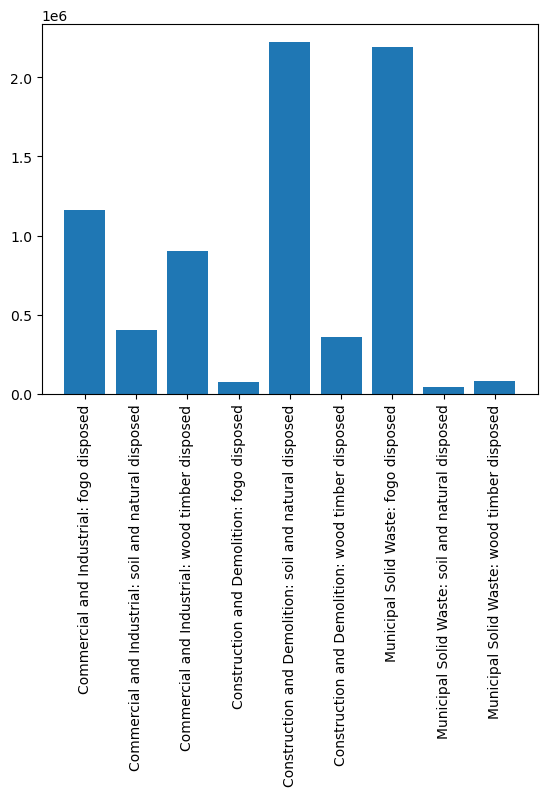

In [5]:
#     commercial_waste = year_data[year_data["waste_stream"] == "Commercial and Industrial"]
year_data = pd.DataFrame(diversion_rates,columns=["year", "disposal_amount", "diverted_amount", "diversion_rate", "fogo_waste"] + [material + "_waste" for material in materials])
year_data
                                                                                                                                   
disposed_material_by_sectors = []
sectors = data["waste_stream"].unique()

for year in years:    
    year_data = data[data["financial_year"] == year]

    
    fogo = year_data[year_data["wpm_material_name"].isin(['Food organics','Garden organics'])]
    soil_and_natural_mat = year_data[year_data["wpm_material_name"] == "Soil and natural materials"] 
    wood_timber = year_data[year_data["wpm_material_name"] == "Wood /timber"] 
    
    year_sector_data = [year]
    for sector in sectors:
        fogo_sector = fogo[fogo["waste_stream"] == sector]
        sector_fogo_disposed = fogo_sector["disposal"].sum()
        sector_soil_and_natural_disposed = soil_and_natural_mat[soil_and_natural_mat["waste_stream"] == sector]["disposal"].sum()
        sector_wood_timber_disposed = wood_timber[wood_timber["waste_stream"] == sector]["disposal"].sum()
        year_sector_data += [sector_fogo_disposed, sector_soil_and_natural_disposed, sector_wood_timber_disposed]
        
    disposed_material_by_sectors.append(year_sector_data)

disposed_material_by_sectors = pd.DataFrame(disposed_material_by_sectors,columns=["year"] + [sector + type  for sector in sectors for type in [": fogo disposed", ": soil and natural disposed", ": wood timber disposed"]])
disposed_material_by_sectors

disposed_material_by_sectors = disposed_material_by_sectors.iloc[-3:]
disposed_material_by_sectors_sum = disposed_material_by_sectors.sum().iloc[1:]
plt.bar(disposed_material_by_sectors_sum.index, disposed_material_by_sectors_sum)
plt.xticks(rotation=90);

disposed_material_by_sectors_sum

In [6]:
disposed_material_by_sectors = []
sectors = data["waste_stream"].unique()

for year in years:    
    year_data = data[data["financial_year"] == year]

    
    fogo = year_data[year_data["wpm_material_name"].isin(['Food organics','Garden organics'])]
    soil_and_natural_mat = year_data[year_data["wpm_material_name"] == "Soil and natural materials"] 
    wood_timber = year_data[year_data["wpm_material_name"] == "Wood /timber"] 
    
    year_sector_data = [year]
    for sector in sectors:
        fogo_sector = fogo[fogo["waste_stream"] == sector]
        sector_fogo_disposed = fogo_sector["disposal"].sum()
        sector_soil_and_natural_disposed = soil_and_natural_mat[soil_and_natural_mat["waste_stream"] == sector]["disposal"].sum()
        sector_wood_timber_disposed = wood_timber[wood_timber["waste_stream"] == sector]["disposal"].sum()
        year_sector_data += [sector_fogo_disposed, sector_soil_and_natural_disposed, sector_wood_timber_disposed]
        
    disposed_material_by_sectors.append(year_sector_data)

disposed_material_by_sectors = pd.DataFrame(disposed_material_by_sectors,columns=["year"] + [sector + type  for sector in sectors for type in [": fogo disposed", ": soil and natural disposed", ": wood timber disposed"]])
disposed_material_by_sectors

,year,Commercial and Industrial: fogo disposed,Commercial and Industrial: soil and natural disposed,Commercial and Industrial: wood timber disposed,Construction and Demolition: fogo disposed,Construction and Demolition: soil and natural disposed,Construction and Demolition: wood timber disposed,Municipal Solid Waste: fogo disposed,Municipal Solid Waste: soil and natural disposed,Municipal Solid Waste: wood timber disposed
0,2005-2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2006-2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2007-2008,386372.947126,133488.427168,299943.020050,23964.449802,707105.735441,114769.102539,767453.087827,16060.744447,29298.803915
3,2008-2009,348578.065657,120430.630757,270602.687154,21620.254779,637936.872415,103542.424637,760236.648730,15909.723641,29023.304295
4,2009-2010,312869.144951,108093.515293,242881.694786,25112.921937,740993.066054,120269.296253,811398.877247,16980.412509,30976.507852
5,2010-2011,324528.322029,112121.657588,251932.765286,26048.763673,768606.429372,124751.173245,811886.219354,16990.611278,30995.112950
6,2011-2012,298269.828304,103049.580847,231548.180992,23941.085388,706416.334603,114657.207087,768833.958260,16089.642379,29351.520951
7,2012-2013,275666.988446,95240.500101,214001.496888,22126.833768,652884.217811,105968.502280,721784.103741,15105.014521,27555.314142
8,2013-2014,269924.993817,93256.691872,209543.961178,21665.943760,639284.991828,103761.235556,754539.460189,15790.496693,28805.804602
9,2014-2015,276248.537580,95441.420170,214452.956044,22173.512701,654261.547224,106192.054225,751792.920997,15733.018960,28700.950882


Commercial and Industrial: fogo disposed                   1162474.75058
Commercial and Industrial: soil and natural disposed       401624.718375
Commercial and Industrial: wood timber disposed            902434.267244
Construction and Demolition: fogo disposed                  75364.007956
Construction and Demolition: soil and natural disposed    2223724.004163
Construction and Demolition: wood timber disposed          360928.776924
Municipal Solid Waste: fogo disposed                      2188513.905059
Municipal Solid Waste: soil and natural disposed            45799.753893
Municipal Solid Waste: wood timber disposed                  83550.17497
dtype: object

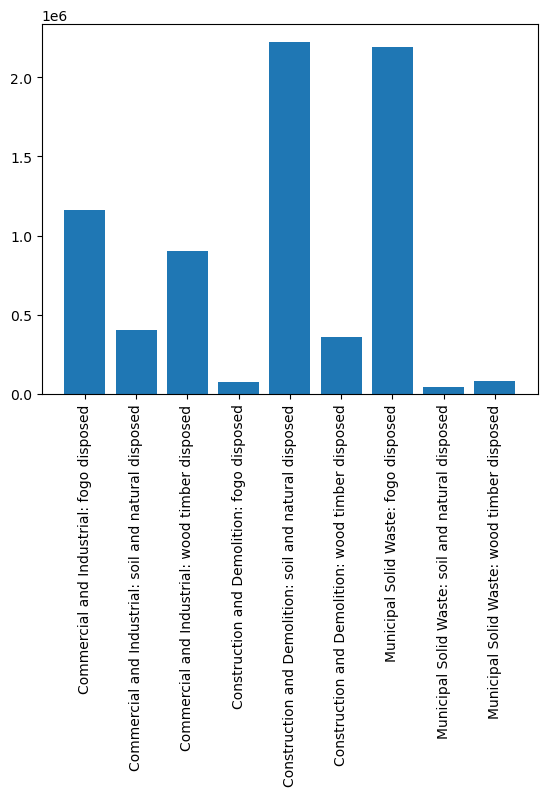

In [7]:
disposed_material_by_sectors = disposed_material_by_sectors.iloc[-3:]
disposed_material_by_sectors_sum = disposed_material_by_sectors.sum().iloc[1:]
plt.bar(disposed_material_by_sectors_sum.index, disposed_material_by_sectors_sum)
plt.xticks(rotation=90);

disposed_material_by_sectors_sum

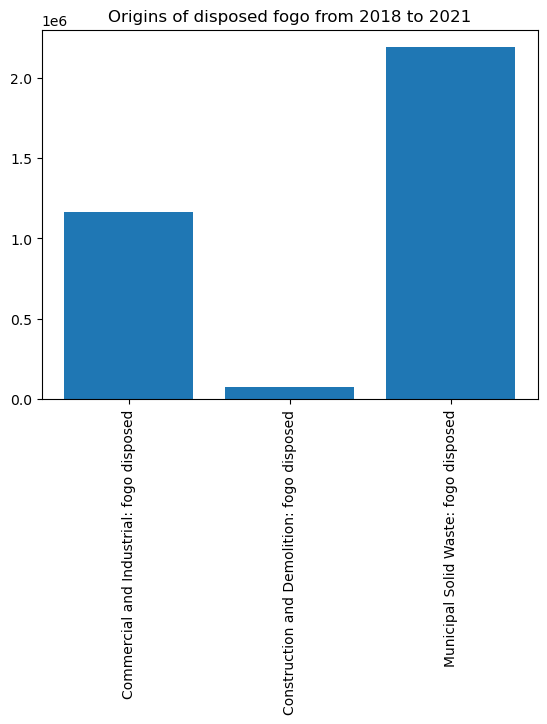

In [8]:

disposed_fogo_origins = disposed_material_by_sectors_sum[["Commercial and Industrial: fogo disposed", "Construction and Demolition: fogo disposed", "Municipal Solid Waste: fogo disposed"]]
plt.bar(disposed_fogo_origins.index, disposed_fogo_origins)
plt.title("Origins of disposed fogo from 2018 to 2021")
plt.xticks(rotation=90);

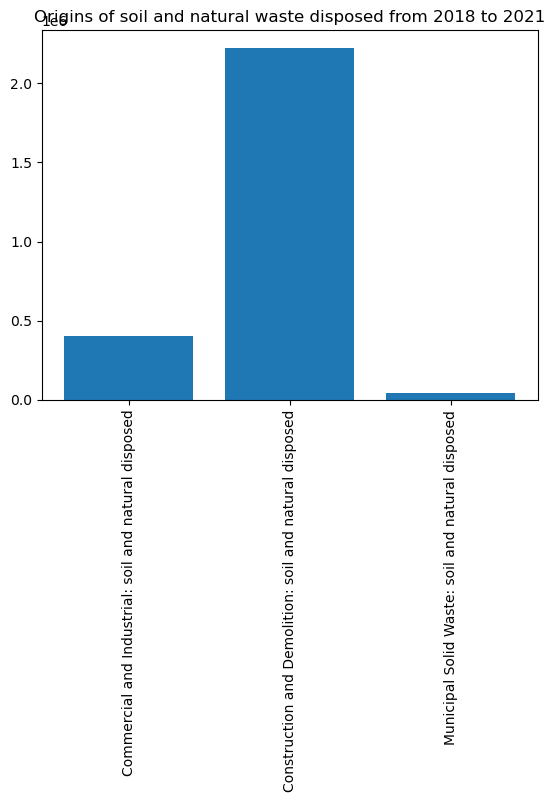

In [9]:

disposed_fogo_origins = disposed_material_by_sectors_sum[["Commercial and Industrial: soil and natural disposed", "Construction and Demolition: soil and natural disposed", "Municipal Solid Waste: soil and natural disposed"]]
plt.bar(disposed_fogo_origins.index, disposed_fogo_origins)
plt.title("Origins of soil and natural waste disposed from 2018 to 2021")
plt.xticks(rotation=90);


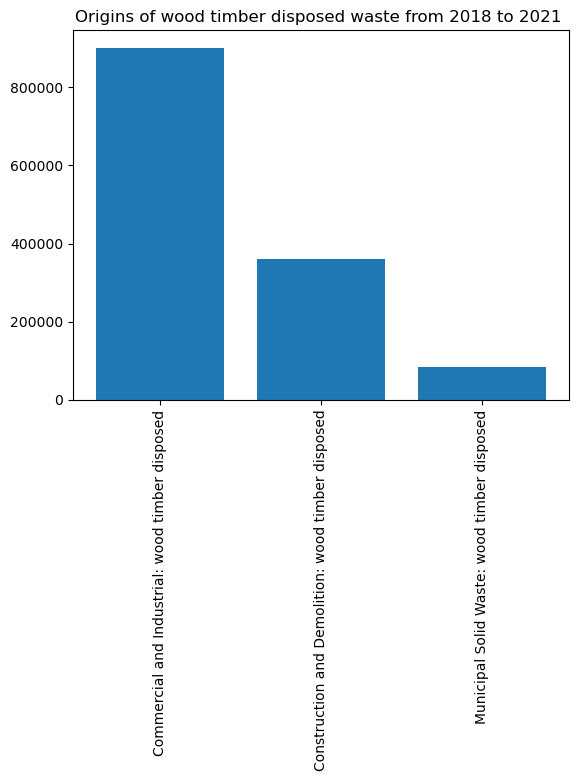

In [10]:

disposed_fogo_origins = disposed_material_by_sectors_sum[["Commercial and Industrial: wood timber disposed", "Construction and Demolition: wood timber disposed", "Municipal Solid Waste: wood timber disposed"]]
plt.bar(disposed_fogo_origins.index, disposed_fogo_origins)
plt.title("Origins of wood timber disposed waste from 2018 to 2021 ")
plt.xticks(rotation=90);